In [27]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target, in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [28]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

print("Class labels:", np.unique(y))

Class labels: [0 1 2]


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=1, stratify=y
)

In [30]:
print("Label counts in y:      ", np.bincount(y))

print("Label counts in y_train:", np.bincount(y_train))

print("Label counts in y_test: ", np.bincount(y_test))

Label counts in y:       [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in y_test:  [15 15 15]


In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [32]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print("Misclassified examples: %d" % (y_test != y_pred).sum())

Misclassified examples: 1


In [33]:
from sklearn.metrics import accuracy_score

print("Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print("Accuracy: %.3f" % ppn.score(X_test_std, y_test))

Accuracy: 0.978
Accuracy: 0.978


In [34]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)

  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(
      x = X[y == cl, 0],
      y = X[y == cl, 1],
      alpha=0.8,
      c = colors[idx],
      marker=markers[idx],
      label = cl,
      edgecolor = 'black'
    )

    if test_idx:
      X_test, y_test = X_test[test_idx, :], y[test_idx]
      plt.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c="",
        edgecolors='black',
        alpha=1.0,
        linewidths=1,
        marker="o",
        s=100,
        label="test set"
      )

UnboundLocalError: local variable 'X_test' referenced before assignment

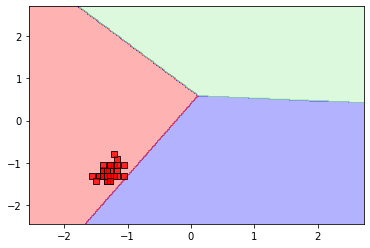

In [36]:
X_combined_std = np.vstack((X_train_std, X_test_std))

y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=(105, 150









))
plt.xlabel("petal, length [standardied]")
plt.ylabel("petal width [standardized]")

plt.legend(loc="upper left")

plt.tight_layout()
plt.show()